#SUPPORT VECTOR MACHINES

# Session 4

In [85]:
# import statements
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris, make_blobs
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score, 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [86]:
# inpDir = os.path.join('..','..','input')
# outDir = '../output'
# moduleDir = 'machine_learning'



## Basic Parameter


RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2


In [87]:
make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

For an example of usage, see
:ref:`sphx_glr_auto_examples_datasets_plot_random_dataset.py`.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or array-like of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is 

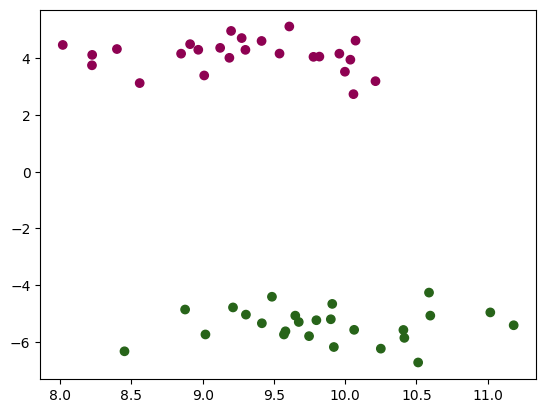

In [88]:
X, y = make_blobs(n_samples=50, centers=2, random_state=RANDOM_STATE, cluster_std=0.60)

plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.PiYG)

In [89]:
clf = SVC(kernel='linear')
clf.fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

1.0

In [90]:
confusion_matrix(y, y_pred)

array([[25,  0],
       [ 0, 25]])

In [91]:
X

array([[ 9.27334708,  4.71480252],
       [ 8.84842323,  4.16467305],
       [10.07240087,  4.62488346],
       [ 9.01922667, -5.7396746 ],
       [11.01792948, -4.96185615],
       [ 8.96893596,  4.3021318 ],
       [ 9.19912194,  4.96691845],
       [ 8.39818466,  4.32795768],
       [10.05773629,  2.73662843],
       [ 9.95880809,  4.16426187],
       [ 9.77726911,  4.05264772],
       [ 9.5701748 , -5.74085459],
       [ 9.30329474, -5.03987144],
       [ 8.87655768, -4.86020755],
       [ 9.99787337,  3.52822093],
       [10.414828  , -5.86024715],
       [ 9.41304174,  4.61275758],
       [ 9.67396781, -5.29914727],
       [ 9.6495809 , -5.07599034],
       [ 9.81867627,  4.06109976],
       [10.59690301, -5.07525235],
       [ 8.22309435,  3.75482464],
       [11.18189255, -5.41480178],
       [ 8.22450353,  4.12198012],
       [ 9.60762895,  5.12380464],
       [ 9.21261058, -4.78638298],
       [ 9.92023226, -6.18262152],
       [10.40817185, -5.58097659],
       [10.2122958 ,

In [92]:
X.shape

(50, 2)

In [93]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1])

(0.0, 1.0)

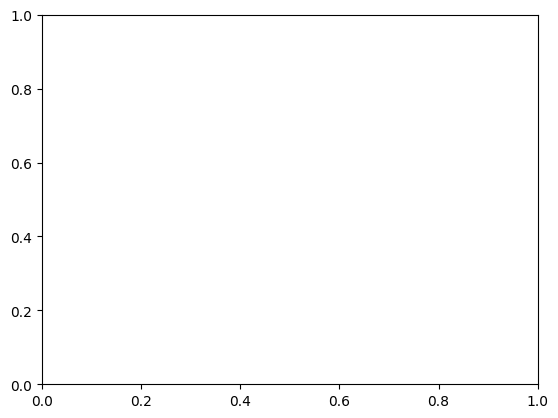

In [94]:
plt.xlim() #X limit

(0.0, 1.0)

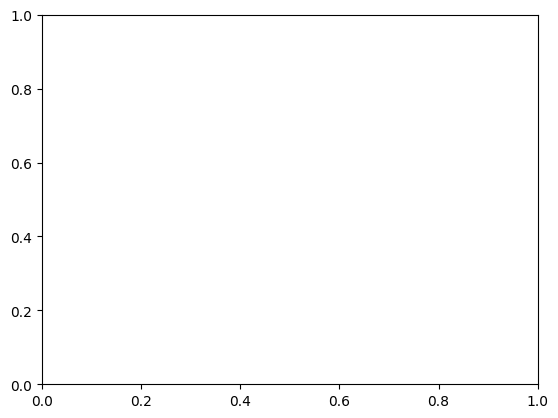

In [95]:
plt.ylim()  #y limit

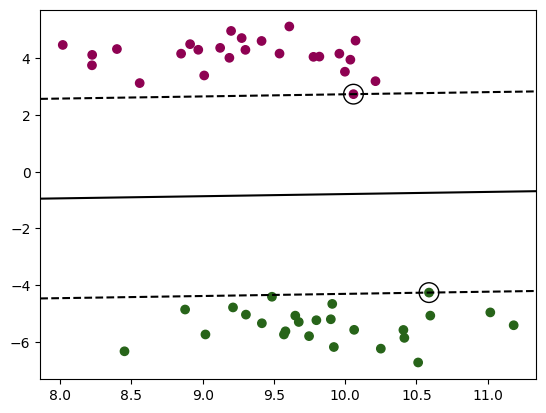

In [96]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.PiYG)
xLim=np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
yLim=np.linspace(plt.ylim()[0], plt.ylim()[1], 30)

YY,XX = np.meshgrid(yLim,xLim) #generate a mesh
preds = np .zeros_like(XX)

for i ,xi in enumerate(xLim):
    for j , yj in enumerate(yLim):
        preds[i,j]=clf.decision_function(np.array([xi,yj]).reshape(1,-1)).item()
        

plt.contour(XX,YY,preds,colors='k', levels=[-1, 0, 1], linestyles = [ '--', '-', '--' ])


plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s = 200, edgecolors='k', facecolor = 'none')


In [97]:
clf.support_vectors_

array([[10.05773629,  2.73662843],
       [10.58790014, -4.26295838]])

In [98]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [99]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [100]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
digits.target, stratify = digits.target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

SVC: kernel :linear  | F1 score : 0.9777
SVC: kernel :rbf     | F1 score : 0.9861
SVC: kernel :poly    | F1 score : 0.9916


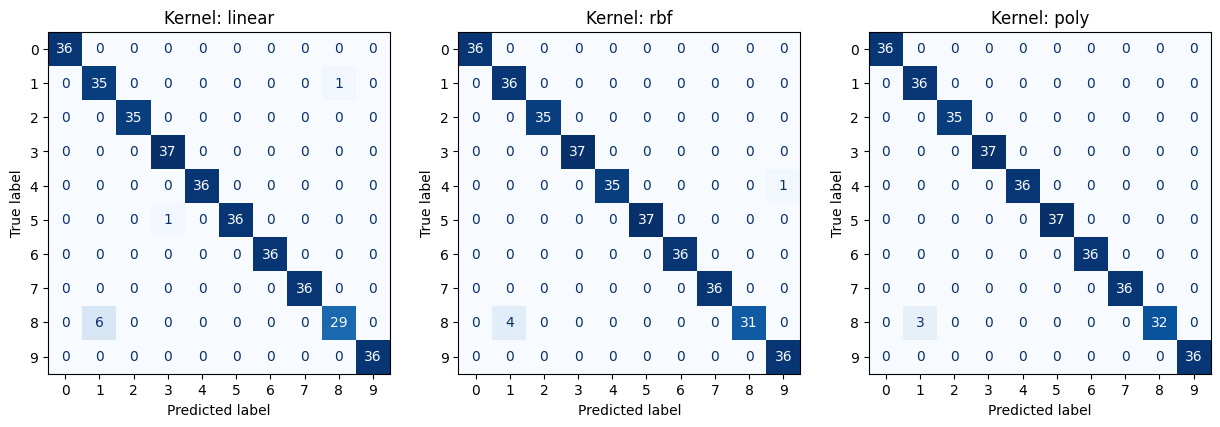

In [101]:
from sklearn.metrics import f1_score, confusion_matrix,ConfusionMatrixDisplay

fig, axes = plt.subplots(1,3, figsize = (15,8)) # instantiate plt object

for i , knl in enumerate(['linear','rbf','poly']):
    clf=SVC(kernel=knl).fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print (f'SVC: kernel :{knl:<7} | F1 score : {f1_score(y_test,y_pred,average="weighted"):.4f}')
    
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    
    disp.plot(ax = axes[i], cmap=plt.cm.Blues, colorbar = False)
    axes[i].set_title(f'Kernel: {knl}')

In [102]:
from sklearn.metrics import f1_score, confusion_matrix,ConfusionMatrixDisplay
f1_score(y_test,y_pred,average="weighted")

0.9916467661691541

In [103]:
digits.data.shape

(1797, 64)

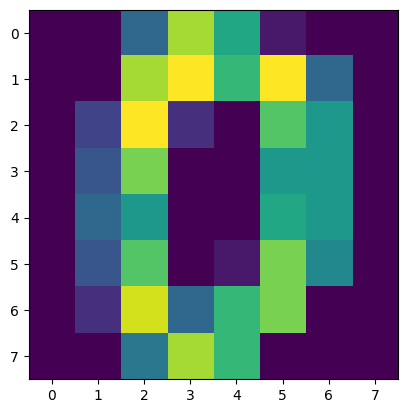

In [104]:
plt.imshow(digits.data[0].reshape(8,8))

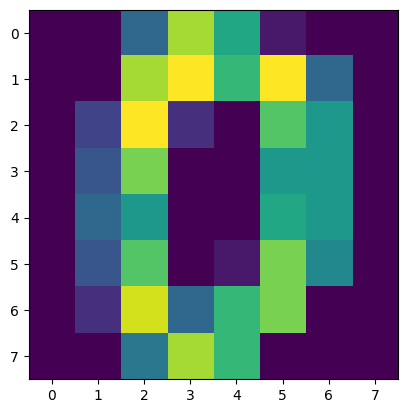

In [105]:
plt.imshow(digits.data[0].reshape(8,8))

In [106]:
iris=load_iris()

features=iris.data
labels=iris.target

features.shape, labels.shape

((150, 4), (150,))

In [115]:
#for convenience create a funtion to plot

def plot_hyplane(classfier,features,labels,i):
    plt.subplot(1, 3, i)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    pred=classfier.predict(features) #make prediction
    
    x_min,x_max=features[:,0].min()- .1,features[:,0].max()+.1
    y_min,y_max=features[:,1].min()- .1,features[:,1].max()+.1

    xx,yy =np.meshgrid(np.linspace(x_min,x_max,1000),np.linspace(y_min,y_max,1000))
    
    Z=classfier.predict(np.c_[xx.ravel(),yy.ravel()])
    
    #plot the decision surfacve
    Z = Z.reshape(xx.shape)
   
    plt.grid(False)
    plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Set3) # refer http://matplotlib.org/users/colormaps.html
    
    # Plot also the training points
    plt.scatter( features [ :,0], features [:,1], c = labels, cmap=plt.cm.flag,s=10)
    
    plt.axis('tight')


In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(features)
features.shape, pca_features.shape

((150, 4), (150, 2))

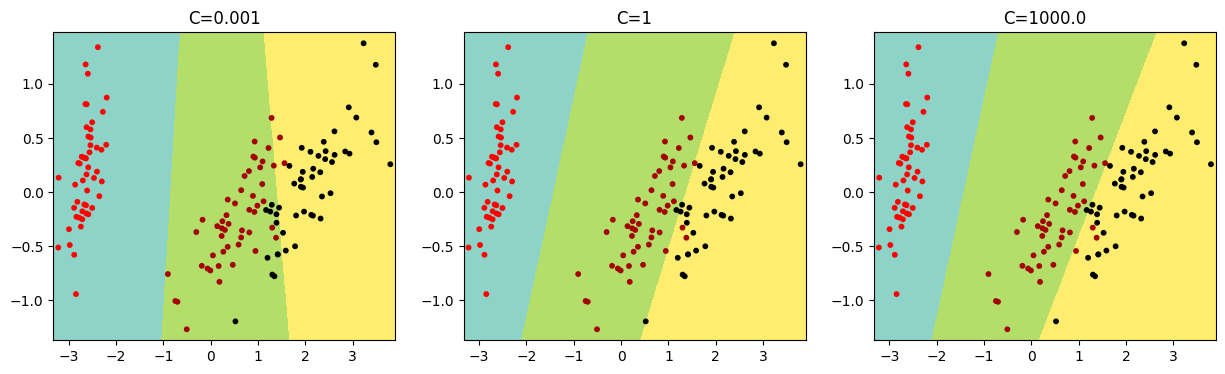

In [117]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

C_values =  [1e-3,1,1e3]

for i , C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    
    clf.fit(pca_features,labels)
    
    plot_hyplane(clf,pca_features,labels,i+1)
    
    plt.title(f'C={C}')
    
plt.show()

# # Gamma
- Small gamma $\rightarrow$ low bias , high variance
- Large Gamma $\rightarrow$ high bias , low variance

gamma = [0.001,1,'auto']

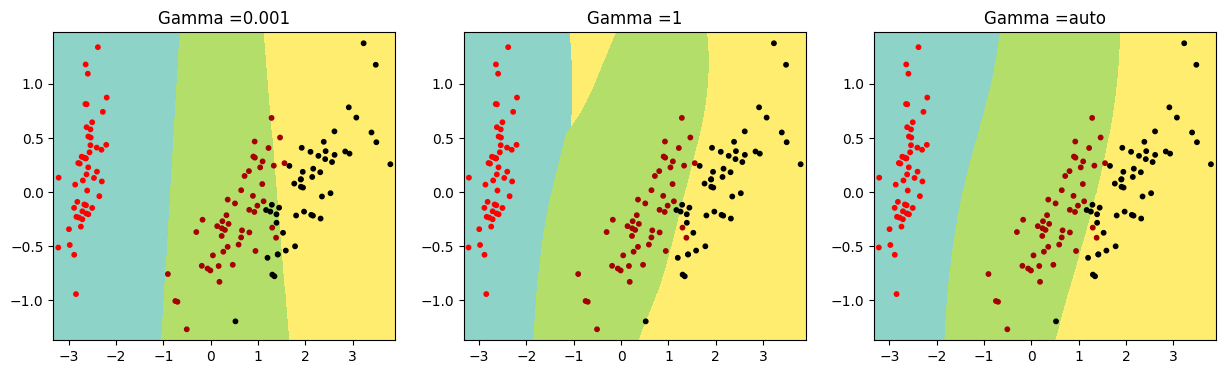

In [118]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

gammas    =  [0.001,1,'auto']

for i,gm in enumerate(gammas):
    clf = SVC(kernel='rbf', gamma=gm)
    
    clf.fit(pca_features,labels)
    
    plot_hyplane(clf,pca_features,labels,i+1)
    
    plt.title(f'Gamma ={gm}')
    
plt.show()